In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [4]:
glass = pd.read_csv('Data/glassClass.csv')

In [5]:
glass.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [6]:
#Label encoding of species column numerically
le = LabelEncoder()
le.fit(glass['Type'])
print(list(le.classes_))
glass['Type'] = le.transform(glass['Type'])

[1, 2, 3, 5, 6, 7]


In [7]:
X = glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]

In [8]:
g_matrix = pd.DataFrame.as_matrix(X)

## Bottom-up algorithms treat each unit as a singleton cluster at the outset and then
## successively merge (or agglomerate) pairs of clusters until all clusters habe been merged into a single cluster 
## that contains all documents. Bottom-up hierarchical clustering is therefore claled hierarchical agglomerative clustering or HAC

In [11]:
cluster_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

In [12]:
cluster_labels = cluster_model.fit_predict(g_matrix)

In [13]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [16]:
g = glass
g['pred']=cluster_labels

In [17]:
g.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,0,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,0,1


In [18]:
# Perfomance Metrics
sm.accuracy_score(g.Type, cluster_labels)

0.30373831775700932

In [19]:
from sklearn import metrics

In [20]:
metrics.adjusted_rand_score(g.Type, cluster_labels)

0.23207987402252414

# Visualize Clustering

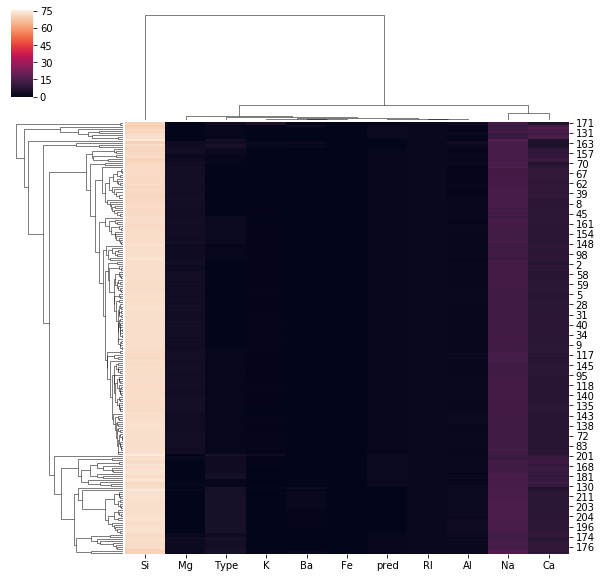

In [21]:
cg = sns.clustermap(glass)
plt.show()

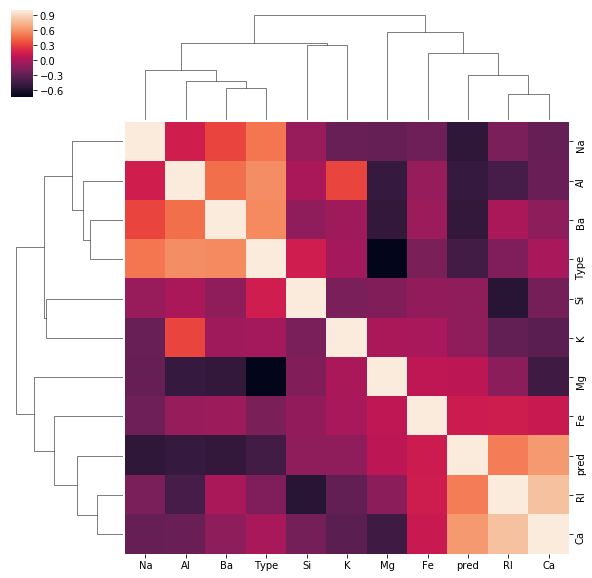

In [25]:
#This is the right shape, but how are distances calculated?
cg = sns.clustermap(glass.corr())
plt.show()

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [28]:
happy = pd.read_csv("Data/2015.csv")

In [29]:
happy.head(7)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570


In [30]:
X1 = happy[['Happiness Score', 'Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)','Generosity','Dystopia Residual']]

In [31]:
X1.head(5)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [32]:
#Dendrogram illustrates how each cluster is composed by drwing a U-shaped link between a non-sigleton
#cluster and its children

In [33]:
#Generate the linkage matrix
Z = linkage (X1, 'ward')

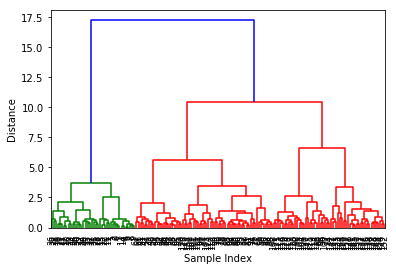

In [34]:
dendrogram(Z,
          leaf_rotation=90., # rotates the x axis labels
          leaf_font_size=8., # font size for the x axis labels
)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

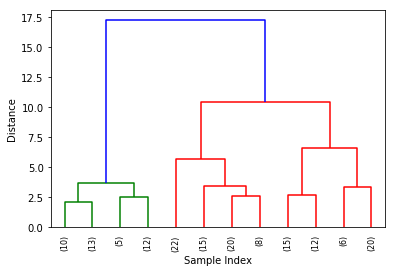

In [35]:
dendrogram(Z, truncate_mode='lastp', p=12,
          leaf_rotation=90., # rotates the x axis labels
          leaf_font_size=8., # font size for the x axis labels
)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [36]:
from scipy.spatial.distance import pdist

In [39]:
X2 = happy[['Happiness Rank','Happiness Score', 'Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)','Generosity','Dystopia Residual']]

In [40]:
X2.head(6)

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [41]:
#Generate the linkage matrix
Z = linkage(X2, method='complete')

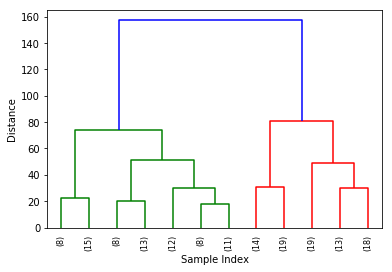

In [42]:
dendrogram(Z, truncate_mode='lastp', p=12,
          leaf_rotation=90., # rotates the x axis labels
          leaf_font_size=8., # font size for the x axis labels
)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

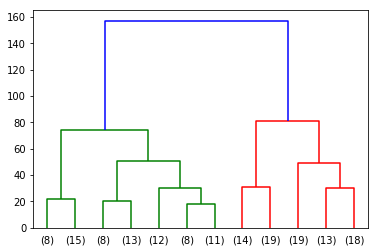

In [48]:
distanceMatrix = pdist(X2)
dend = dendrogram(linkage(distanceMatrix, method='complete'), truncate_mode='lastp', p=12,
                 leaf_font_size=10,
                 labels = X2['Happiness Rank'].tolist()) 

In [49]:
from scipy.cluster.hierarchy import fcluster

In [50]:
assigments = fcluster(linkage(distanceMatrix, method='complete'),4,'distance')

In [56]:
cluster_outputs = pd.DataFrame({'Happiness Rank':X2['Happiness Rank'].tolist(), 'cluster':assigments})

In [57]:
cluster_outputs.head(6)

,Happiness Rank,cluster
0,1,48
1,2,48
2,3,48
3,4,48
4,5,50
5,6,50


In [58]:
happy['Happiness Rank']
new=pd.merge(cluster_outputs,happy, on='Happiness Rank')

In [59]:
new.head(6)

,Happiness Rank,cluster,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,48,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,48,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,48,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,48,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,50,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,6,50,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
